# Clusterização

#### Foi usado um banco de dados da Premier League, com estatísticas dos times na temporada 18/19, com várias informações, e a tarefa foi clusterizar essa base para podermos indentificar os agrupamentos de times, e suas divisões com base nas características. Foi usado as bibliotecas scikit learn( biblioteca de algoritmos de ML e métricas),pandas (biblioteca de funçĩes para manipulação de base de dados) e matplotlib (biblioteca usada para plotar gráficos e demais).

## Pré-processamento

#### O pré-processamento foi feito em outro arquivo  "Cluster.py" , com o fim de não sujar tanto esse. Inicialmente foi visto que muitas características eram redundantes, visto que tinham a mesma representatividade, e por isso foram retirados, como exemplo 'general_league_position' e 'general_points', também foi retirado informações constantes como o caso de 'general_matches_played', onde todas as equipes jogaram 38 jogos, e isso não influencia em nada na clusterização. Outro ponto importante nos dados foi o teste de correlação que mostra o quão parecida algumas características são, como o caso de 'finance _team_market' e 'finance _market_average', nesses casos foram retirados as características menos representativas. Também foi introduzida duas novas colunas do arquito de transferências do time, é importante diferenciar o quanto as equipes gastaram nos últimos 10 anos e o quanto gastaram para essa temporada em questão. Após esses procedimentos foi então usado um pequeno algoritmo para limpar as informações que transformavam valores importantes em string, e depois foi tudo salvo em um novo arquivo, finaldata.csv esse é o arquivo utilizado nesse código. Primeiro passo foi usar o label encoder para tranformar os valores de string em numéricos.

In [85]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

le = preprocessing.LabelEncoder()


data = pd.read_csv('finaldata.csv')


data['category'] = le.fit_transform(data['category'])


times = ['Arsenal:', "Bournemouth:", 'Brighton' ,'Burnley:', 'Cardiff:', 'Chelsea:', 'Crystal Palace:', 'Everton:', "Fulham:", 'Huddersfield:', 'Leicester:', 'Liverpool:', 'Manchester City:', 'Manchester United:', 'NewCastle United:', 'Southampton:', 'Tottenham:', 'Watford:', 'West Ham:', 'Wolverhampton:' ]



## Treinamento e Resultados

#### Foram usados os algoritmos, KMeans e Hierárquico para a clusterização, o primeiro usa pontos aleatórios no espaço NDimensional, onde N é o número de características das amostras, para agrupar os valores mais próximos, já o segundo usa as distâncias máximas e mínimas entre esses pontos para agrupa-los.

In [86]:
# max_iter = 10

km = KMeans(n_clusters = 2, init = 'random')

km.fit(data)

clusters = km.predict(data)


#_______________________________________________________________________________

# linkage = 'average'

hie = AgglomerativeClustering(n_clusters = 2)

clHie = hie.fit_predict(data)

#_______________________________________________________________________________

frame = []

for i in range(len(times)):
	frame += [[times[i],clusters[i],clHie[i]]]


df = pd.DataFrame(frame, columns = ['Time', 'KMeans', 'Hierarchical'],)

df

,Time,KMeans,Hierarchical
0,Arsenal:,1,0
1,Bournemouth:,0,1
2,Brighton,0,1
3,Burnley:,0,1
4,Cardiff:,0,1
5,Chelsea:,1,0
6,Crystal Palace:,0,1
7,Everton:,0,1
8,Fulham:,0,1
9,Huddersfield:,0,1


#### Se percebe pelos resultados, que apesar da classificação invertida dos grupos, os dados foram agrupados igualmente, no caso de 2 clusters, isso mostra uma efetividade nos dois códigos, visando que conseguiu separar o Big Six da inglaterra, os 6 grandes times dessa liga, dos demais. Ainda é vista essa proximidade dos algoritmos pelo valor da silhouette_score, que é identico, ou seja esses dois algoritmos foram ótimos na minha concepção.

0.7785944227262622

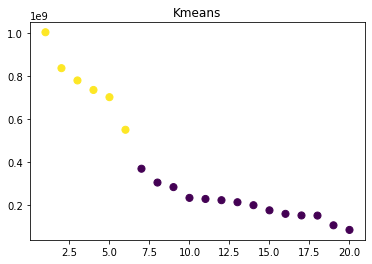

In [87]:
plt.scatter(data['general_league_position'], data['finance _team_market'], s=50, c=clusters, cmap='viridis')
plt.title("Kmeans")

silhouette_score(data, km.labels_, metric='euclidean')

0.7785944227262622

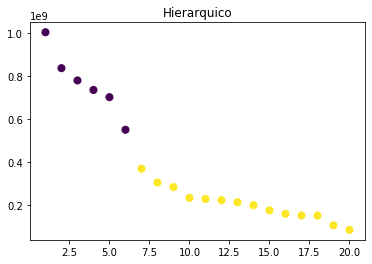

In [88]:
plt.scatter(data['general_league_position'], data['finance _team_market'], c=clHie,s = 50, cmap='viridis')
plt.title("Hierarquico")

silhouette_score(data, clHie, metric='euclidean')

#### Ao colocar para ser dividido em 5 clusters, começa a se perceber melhor a diferença dos algoritmos, onde alguns clusters parecem bem diferentes, quando se olha os gráficos, e também é assinalado pelo score que começa a cair. 

In [89]:
# max_iter = 10

km = KMeans(n_clusters = 5, init = 'random')

km.fit(data)

clusters = km.predict(data)


#_______________________________________________________________________________

# linkage = 'average'

hie = AgglomerativeClustering(n_clusters = 5)

clHie = hie.fit_predict(data)

#_______________________________________________________________________________

frame = []

for i in range(len(times)):
	frame += [[times[i],clusters[i],clHie[i]]]


df = pd.DataFrame(frame, columns = ['Time', 'KMeans', 'Hierarchical'],)


0.46601710553903597

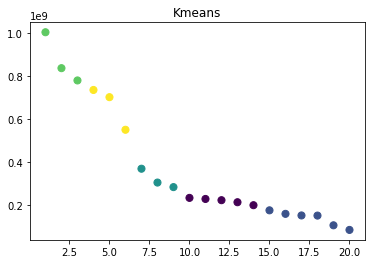

In [90]:
plt.scatter(data['general_league_position'], data['finance _team_market'], s=50, c=clusters, cmap='viridis')
plt.title("Kmeans")

silhouette_score(data, km.labels_, metric='euclidean')



0.5104876922072101

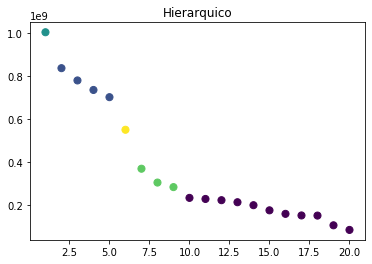

In [91]:
plt.scatter(data['general_league_position'], data['finance _team_market'], c=clHie,s = 50, cmap='viridis')
plt.title("Hierarquico")

silhouette_score(data, clHie, metric='euclidean')

#### Com 10 clusters as coisas parecem se estabilizar, com a score parecida com a de 5, não se vê tanta diferença nos resultados dos algoritmos, apesar de terem grupos totalmente diferentes.

In [92]:
# max_iter = 10

km = KMeans(n_clusters = 10, init = 'random')

km.fit(data)

clusters = km.predict(data)


#_______________________________________________________________________________

# linkage = 'average'

hie = AgglomerativeClustering(n_clusters = 10)

clHie = hie.fit_predict(data)

#_______________________________________________________________________________

frame = []

for i in range(len(times)):
	frame += [[times[i],clusters[i],clHie[i]]]


df = pd.DataFrame(frame, columns = ['Time', 'KMeans', 'Hierarchical'],)

df

,Time,KMeans,Hierarchical
0,Arsenal:,3,2
1,Bournemouth:,9,0
2,Brighton,4,0
3,Burnley:,4,0
4,Cardiff:,4,0
5,Chelsea:,3,9
6,Crystal Palace:,8,3
7,Everton:,2,1
8,Fulham:,1,6
9,Huddersfield:,1,6


0.3585376157788179

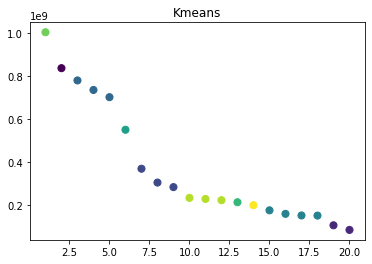

In [93]:
plt.scatter(data['general_league_position'], data['finance _team_market'], s=50, c=clusters, cmap='viridis')
plt.title("Kmeans")

silhouette_score(data, km.labels_, metric='euclidean')

0.44355618509834815

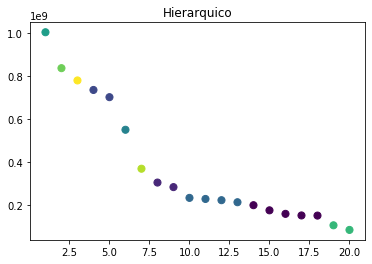

In [94]:
plt.scatter(data['general_league_position'], data['finance _team_market'], c=clHie,s = 50, cmap='viridis')
plt.title("Hierarquico")

silhouette_score(data, clHie, metric='euclidean')

### Mudando número de iterações K-means

#### É evidente a diferença que esse parametro faz, do número de iterações 1 para o 100, se perceber uma melhora no score, assim como se percebe as amostras melhor agrupadas, assim quanto maior o número de iterações melhor o resultado, nesse caso, pois como os centróides são aleatórios se pode agrupar melhor os dados com mais iterações, já em um primeiro instante como é no cas de 1 iteração pode não ser tão efetivo.

0.38178041980293204

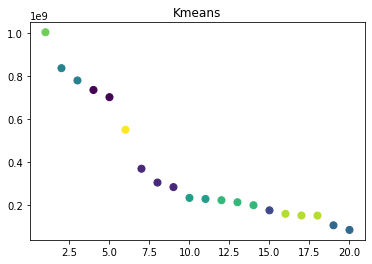

In [95]:
km = KMeans(n_clusters = 10, init = 'random', max_iter = 1)

km.fit(data)

clusters = km.predict(data)

plt.scatter(data['general_league_position'], data['finance _team_market'], s=50, c=clusters, cmap='viridis')
plt.title("Kmeans")

silhouette_score(data, km.labels_, metric='euclidean')

0.444951514995103

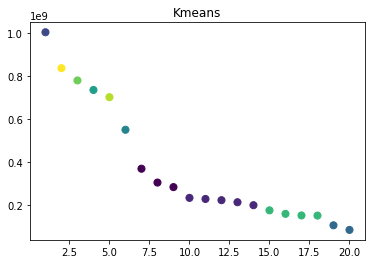

In [96]:
km = KMeans(n_clusters = 10, init = 'random', max_iter = 10)

km.fit(data)

clusters = km.predict(data)

plt.scatter(data['general_league_position'], data['finance _team_market'], s=50, c=clusters, cmap='viridis')
plt.title("Kmeans")

silhouette_score(data, km.labels_, metric='euclidean')

0.44964062181651504

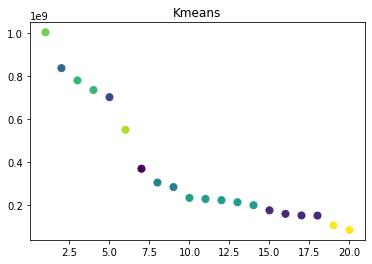

In [97]:
km = KMeans(n_clusters = 10, init = 'random', max_iter = 100)

km.fit(data)

clusters = km.predict(data)

plt.scatter(data['general_league_position'], data['finance _team_market'], s=50, c=clusters, cmap='viridis')
plt.title("Kmeans")

silhouette_score(data, km.labels_, metric='euclidean')

### Mudando o Linkage do hierárquico

#### Ao se mudar os linkages, se percebe que há uma queda de desempenho no single, este usa a menor distância como critério para o agrupamento, e isso dificulta bastante na hora da clusterização, visando que como o número de clusters é alto isso pode gerar vies no resultado, pois alguns podem está mais próximos e afetar as outras amostras que não estão tão próximas, já o average tem um melhor score justamente pq usa a média das distâncias como critério e consegue agrupar melhor os dados, pois respeita todas as distâncias entre os dados.

0.4912920750366453

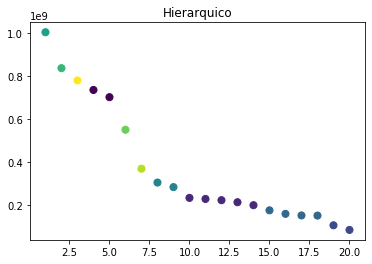

In [98]:
hie = AgglomerativeClustering(n_clusters = 10, linkage = 'average')

clHie = hie.fit_predict(data)

plt.scatter(data['general_league_position'], data['finance _team_market'], c=clHie,s = 50, cmap='viridis')
plt.title("Hierarquico")

silhouette_score(data, clHie, metric='euclidean')

0.44355618509834815

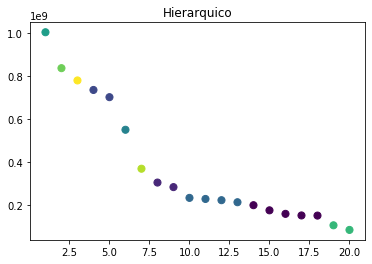

In [99]:
hie = AgglomerativeClustering(n_clusters = 10, linkage = 'ward')

clHie = hie.fit_predict(data)

plt.scatter(data['general_league_position'], data['finance _team_market'], c=clHie,s = 50, cmap='viridis')
plt.title("Hierarquico")

silhouette_score(data, clHie, metric='euclidean')

0.44355618509834815

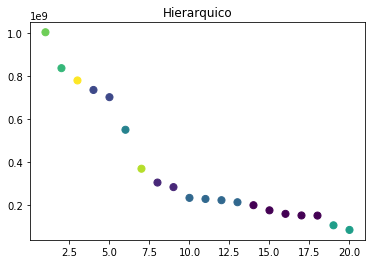

In [100]:
hie = AgglomerativeClustering(n_clusters = 10, linkage = 'complete')

clHie = hie.fit_predict(data)

plt.scatter(data['general_league_position'], data['finance _team_market'], c=clHie,s = 50, cmap='viridis')
plt.title("Hierarquico")

silhouette_score(data, clHie, metric='euclidean')

0.3273800515964095

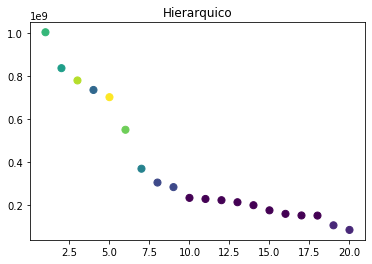

In [101]:
hie = AgglomerativeClustering(n_clusters = 10, linkage = 'single')

clHie = hie.fit_predict(data)

plt.scatter(data['general_league_position'], data['finance _team_market'], c=clHie,s = 50, cmap='viridis')
plt.title("Hierarquico")

silhouette_score(data, clHie, metric='euclidean')

## Conclusão

#### Concluindo, os dois algoritmos tem defeitos e qualidades, visando isso, o que tem o pior defeito é o K-means que depende de chutes iniciais e se não tiver uma quantidade razoável de iterações será pouco efetivo, já o hierárquico é um pouco limitado pois é estável e nunca mudará seus resultados, de certa forma é bom mas não em todos os casos, onde o K-means pode se sobresair por não ter resultados constantes. Nesse caso, o algoritmo Hierárquico se saiu melhor.